<a href="https://colab.research.google.com/github/homeromolina/Analise_Acoes_IBOV/blob/main/PCA_for_Algorithmic_Trading_Data_Driven_Risk_Factors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Contexto e PCA**



*   **Contexto**: queremos explorar um algoritmo não supervisionado (PCA -  *Principal Component Analysis*) nos retornos diários dos ativos do S&P500 para construção de carteiras não correlacionadas de acordo com os principais componentes da matriz de correlação dos retornos, assim podemos mitigar riscos sistémicos e criar um bom hedge (**hedge** é um termo muito utilizado no mercado financeiro, pois é um instrumento fundamental para proteger o investidor contra os riscos de mercado, como variações de preços).

*   **Explicando o PCA**: é um procedimento matemático criado em 1901 por Karl Pearson, utiliza uma transformação ortogonal (ortogonalização de vetores) para converter um conjunto de observações de variáveis possivelmente correlacionadas num conjunto de valores variáveis linearmente não correlacionados, chamados de **componentes principais**. Normalmente é utilizado para análise exploratória de dados e em modelos preditivos, pode ser feito por decomposição em autovalores de uma matriz de covariância, posterior a normalização dos dados.
Seus resultados normalmente são discutidos em scores de seus componentes ou pontuaçÕes de fatores, com peso de cada variável.
Na sua grande maioria, utilizam este modelo para reduzir a dimensionalidade sem perder sua variância.

- **Calculo**: Dado um conjunto de pontos no espaço euclidiano, o primeiro componente principal corresponde a uma linha que passa através da média multidimensional e minimiza a soma dos quadrados das distâncias dos pontos à linha. O segundo componente principal corresponde ao mesmo conceito, depois de subtrair-se toda a correlação com o primeiro componente principal dos pontos. Os valores singulares (em Σ) são as raízes quadradas dos autovalores da matriz XXT. Cada autovalor é proporcional à porção de "variância" (mais precisamente da soma dos quadrados das distâncias dos pontos à média multidimensional dos mesmos) que é correlacionada com cada autovetor. A soma de todos os autovalores é igual à soma dos quadrados dos pontos à média multidimensional dos mesmos. O PCA essencialmente rotaciona o conjunto de pontos em torno da média de forma a alinhá-los com os componentes principais. Isto move o máximo possível de variância (usando uma transformação ortogonal) a algumas das primeiras dimensões. Os valores nas dimensões restantes, portanto, tendem a serem pequenos e podem ser descartados com o mínimo de perda de informação. O PCA é comumente utilizado dessa maneira para redução de dimensionalidade. O PCA tem a distinção de ser a melhor transformação ortogonal para manter o subespaço que tem a maior "variância" (como definida ha pouco). No entanto, essa vantagem tem o preço de exigir mais recursos computacionais se comparado com, por exemplo, a transformada discreta de cosseno (quando esta também for aplicável). Técnicas de redução de dimensionalidade não linear tendem a ser ainda mais dispendiosas (computacionalmente) do que o PCA.

Fonte: *https://pt.wikipedia.org/wiki/An%C3%A1lise_de_componentes_principais, https://github.com/stefan-jansen/machine-learning-for-trading/blob/main/13_unsupervised_learning/01_linear_dimensionality_reduction/03_pca_and_risk_factor_models.ipynb, https://slideplayer.com.br/slide/8358137/*

# **Sumário**




1.   Imports & Settings
2.   Cleaning Data
3.   Risk Factors






# **Imports & Settings**

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import  numpy                 as np
import  pandas                as pd
import matplotlib.pyplot      as plt
import yfinance               as yf
import bs4                    as bs
import requests              

%matplotlib inline

import warnings

import seaborn                as sns
from sklearn.decomposition    import PCA
from matplotlib.ticker        import FuncFormatter
import plotly.express         as px

In [ ]:
plt.style.use('fivethirtyeight')

# **Cleaning data**

In [ ]:
# Scrap S&P500 TICKERS

def save_sp500_tickers():

  resp  = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
  soup  = bs.BeautifulSoup(resp.text,'html')
  table = soup.find('table',{'class' : 'wikitable sortable'})
  tickers = []
  for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    if not '.' in ticker:
      tickers.append(ticker.replace('\n',''))

  return tickers

tickers = save_sp500_tickers()

In [ ]:
prices = yf.download(tickers,
                     start = '2020-01-01',
                     end   = '2022-05-01')['Adj Close']

[*********************100%***********************]  502 of 502 completed


In [ ]:
prices

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,84.666733,28.982893,154.629822,73.785912,79.461998,81.815132,168.809998,83.667694,203.171127,334.429993,...,142.405029,58.709503,60.554607,55.849358,77.520622,97.649071,142.509018,259.140015,48.681541,132.200867
2020-01-03,83.307350,27.548195,154.639542,73.068565,78.707741,80.786217,166.820007,82.647705,202.832733,331.809998,...,140.292755,58.991844,60.067802,55.231319,77.976929,97.343239,142.136505,256.049988,47.994576,132.220551
2020-01-06,83.553619,27.219410,152.098083,73.650803,79.328896,81.969009,179.039993,83.080719,201.508224,333.709991,...,140.015091,58.907143,60.528996,55.535431,77.472084,97.285904,141.315033,258.010010,47.409733,131.205460
2020-01-07,83.809731,27.119778,150.293854,73.304405,78.876350,81.382416,180.350006,82.618835,197.157684,333.390015,...,140.679504,58.784790,60.033630,55.829739,77.180840,97.457932,141.190887,256.470001,47.121941,131.648956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,121.449997,19.980000,223.869995,162.641037,156.300003,157.989182,302.140015,120.010002,316.820007,413.950012,...,72.209999,73.699997,81.425934,41.529999,83.742310,120.671989,127.809998,388.940002,60.667156,180.300003
2022-04-26,117.940002,18.770000,223.440002,156.569962,156.179993,156.772888,285.869995,116.970001,303.100006,399.119995,...,68.220001,73.379997,81.455627,40.820000,80.514168,116.114578,124.150002,374.500000,55.443565,176.970001
2022-04-27,117.680000,18.969999,224.880005,156.340302,157.619995,156.982254,277.149994,116.720001,303.100006,397.899994,...,67.949997,72.970001,83.781799,40.290001,81.809410,116.323540,122.879997,371.109985,55.622318,178.470001


In [ ]:
# Reset the index
df = prices.reset_index()

# Drop the first roww
df = df.iloc[1:]
df

,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
1,2020-01-02,84.666733,28.982893,154.629822,73.785912,79.461998,81.815132,168.809998,83.667694,203.171127,...,142.405029,58.709503,60.554607,55.849358,77.520622,97.649071,142.509018,259.140015,48.681541,132.200867
2,2020-01-03,83.307350,27.548195,154.639542,73.068565,78.707741,80.786217,166.820007,82.647705,202.832733,...,140.292755,58.991844,60.067802,55.231319,77.976929,97.343239,142.136505,256.049988,47.994576,132.220551
3,2020-01-06,83.553619,27.219410,152.098083,73.650803,79.328896,81.969009,179.039993,83.080719,201.508224,...,140.015091,58.907143,60.528996,55.535431,77.472084,97.285904,141.315033,258.010010,47.409733,131.205460
4,2020-01-07,83.809731,27.119778,150.293854,73.304405,78.876350,81.382416,180.350006,82.618835,197.157684,...,140.679504,58.784790,60.033630,55.829739,77.180840,97.457932,141.190887,256.470001,47.121941,131.648956
5,2020-01-08,84.637192,27.737495,148.567215,74.483604,79.435371,82.170952,178.690002,82.955620,197.544418,...,141.562103,58.728321,59.128300,56.418343,77.442963,97.629967,142.881500,247.639999,47.586117,131.363144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,2022-04-25,121.449997,19.980000,223.869995,162.641037,156.300003,157.989182,302.140015,120.010002,316.820007,...,72.209999,73.699997,81.425934,41.529999,83.742310,120.671989,127.809998,388.940002,60.667156,180.300003
584,2022-04-26,117.940002,18.770000,223.440002,156.569962,156.179993,156.772888,285.869995,116.970001,303.100006,...,68.220001,73.379997,81.455627,40.820000,80.514168,116.114578,124.150002,374.500000,55.443565,176.970001
585,2022-04-27,117.680000,18.969999,224.880005,156.340302,157.619995,156.982254,277.149994,116.720001,303.100006,...,67.949997,72.970001,83.781799,40.290001,81.809410,116.323540,122.879997,371.109985,55.622318,178.470001
586,2022-04-28,121.059998,19.430000,209.389999,163.399918,156.309998,157.271362,287.220001,118.010002,313.839996,...,70.739998,74.879997,86.315842,40.189999,83.104660,118.930618,124.610001,382.980011,57.588615,181.309998


In [ ]:
df_daily_returns = df.drop(['Date'], axis=1)
df_daily_returns = df_daily_returns.pct_change()
df_daily_returns

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.016056,-0.049502,0.000063,-0.009722,-0.009492,-0.012576,-0.011788,-0.012191,-0.001666,-0.007834,...,-0.014833,0.004809,-0.008039,-0.011066,0.005886,-0.003132,-0.002614,-0.011924,-0.014111,0.000149
3,0.002956,-0.011935,-0.016435,0.007968,0.007892,0.014641,0.073253,0.005239,-0.006530,0.005726,...,-0.001979,-0.001436,0.007678,0.005506,-0.006474,-0.000589,-0.005779,0.007655,-0.012186,-0.007677
4,0.003065,-0.003660,-0.011862,-0.004703,-0.005705,-0.007156,0.007317,-0.005559,-0.021590,-0.000959,...,0.004745,-0.002077,-0.008184,0.005299,-0.003759,0.001768,-0.000879,-0.005969,-0.006070,0.003380
5,0.009873,0.022777,-0.011488,0.016086,0.007087,0.009689,-0.009204,0.004076,0.001962,0.013438,...,0.006274,-0.000961,-0.015080,0.010543,0.003396,0.001765,0.011974,-0.034429,0.009851,-0.002171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,0.001072,-0.009911,0.025093,0.006737,0.008452,-0.003333,0.021330,0.003093,0.019369,0.012920,...,-0.013525,-0.008075,-0.033713,0.014164,-0.007323,-0.009232,0.016786,0.028996,0.005762,-0.009068
584,-0.028901,-0.060561,-0.001921,-0.037328,-0.000768,-0.007699,-0.053849,-0.025331,-0.043305,-0.035826,...,-0.055255,-0.004342,0.000365,-0.017096,-0.038549,-0.037767,-0.028636,-0.037127,-0.086102,-0.018469
585,-0.002205,0.010655,0.006445,-0.001467,0.009220,0.001335,-0.030503,-0.002137,0.000000,-0.003057,...,-0.003958,-0.005587,0.028558,-0.012984,0.016087,0.001800,-0.010230,-0.009052,0.003224,0.008476
586,0.028722,0.024249,-0.068881,0.045155,-0.008311,0.001842,0.036334,0.011052,0.035434,0.031742,...,0.041060,0.026175,0.030246,-0.002482,0.015833,0.022412,0.014079,0.031985,0.035351,0.015913


In [ ]:
# Substituindo as células nulas pela média de variação do dia
returns = df_daily_returns

# Substituindo os NaN com a média
returns = returns.apply(lambda x: x.fillna(x.mean()),axis=0)
#returns = returns.apply(lambda x: x.fillna(daily_avg))
returns

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
1,0.000767,0.000430,0.000711,0.001560,0.001203,0.001251,0.001255,0.000710,0.000877,0.000615,...,-0.000334,0.000549,0.000912,-0.000268,0.000318,0.000509,0.000011,0.000930,0.000700,0.000690
2,-0.016056,-0.049502,0.000063,-0.009722,-0.009492,-0.012576,-0.011788,-0.012191,-0.001666,-0.007834,...,-0.014833,0.004809,-0.008039,-0.011066,0.005886,-0.003132,-0.002614,-0.011924,-0.014111,0.000149
3,0.002956,-0.011935,-0.016435,0.007968,0.007892,0.014641,0.073253,0.005239,-0.006530,0.005726,...,-0.001979,-0.001436,0.007678,0.005506,-0.006474,-0.000589,-0.005779,0.007655,-0.012186,-0.007677
4,0.003065,-0.003660,-0.011862,-0.004703,-0.005705,-0.007156,0.007317,-0.005559,-0.021590,-0.000959,...,0.004745,-0.002077,-0.008184,0.005299,-0.003759,0.001768,-0.000879,-0.005969,-0.006070,0.003380
5,0.009873,0.022777,-0.011488,0.016086,0.007087,0.009689,-0.009204,0.004076,0.001962,0.013438,...,0.006274,-0.000961,-0.015080,0.010543,0.003396,0.001765,0.011974,-0.034429,0.009851,-0.002171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,0.001072,-0.009911,0.025093,0.006737,0.008452,-0.003333,0.021330,0.003093,0.019369,0.012920,...,-0.013525,-0.008075,-0.033713,0.014164,-0.007323,-0.009232,0.016786,0.028996,0.005762,-0.009068
584,-0.028901,-0.060561,-0.001921,-0.037328,-0.000768,-0.007699,-0.053849,-0.025331,-0.043305,-0.035826,...,-0.055255,-0.004342,0.000365,-0.017096,-0.038549,-0.037767,-0.028636,-0.037127,-0.086102,-0.018469
585,-0.002205,0.010655,0.006445,-0.001467,0.009220,0.001335,-0.030503,-0.002137,0.000000,-0.003057,...,-0.003958,-0.005587,0.028558,-0.012984,0.016087,0.001800,-0.010230,-0.009052,0.003224,0.008476
586,0.028722,0.024249,-0.068881,0.045155,-0.008311,0.001842,0.036334,0.011052,0.035434,0.031742,...,0.041060,0.026175,0.030246,-0.002482,0.015833,0.022412,0.014079,0.031985,0.035351,0.015913


# **PCA**


> Now we are ready to fit the principal components model to the asset returns using default parameters to compute all components using the full SVD algorithm (singular value decomposition).

> O número estimado de componentes. Quando n_components é definido como 'mle' ou um número entre 0 e 1 (com svd_solver == 'full') esse número é estimado a partir dos dados de entrada. Caso contrário, é igual ao parâmetro n_components ou o menor valor de n_features e n_samples se n_components for None.

> MLE: processo de estimação baseada em verosimilhança.

In [ ]:
pca = PCA(n_components='mle')
pca.fit(returns)

PCA(n_components='mle')

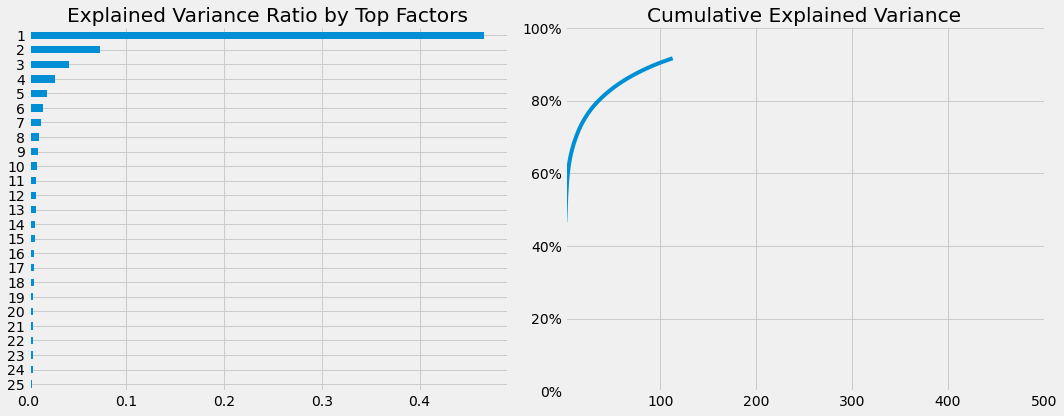

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
title = 'Explained Variance Ratio by Top Factors'
var_expl = pd.Series(pca.explained_variance_ratio_)
var_expl.index += 1
var_expl.iloc[:25].sort_values().plot.barh(title=title,
                                           ax=axes[0])
var_expl.cumsum().plot(ylim=(0, 1),
                       ax=axes[1],
                       title='Cumulative Explained Variance',
                       xlim=(1, 500))
axes[1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0%}'))
sns.despine()
fig.tight_layout()

# O plot mostra a var. explicada acumulada indica que 1 fator explica 47% das 502 empresas, 2 fatores explicam 54,37%



> O plot constata que o primeiro fator explica cerca de 47% da variação do retorno diário. Normalmente o fator dominante é interpretado como "o mercado", enquanto os demais fatores podem ser ocasionados pela indústria ou estilo.

> O gráfico de linha mostra a variância acumulada/*explained_variance_ratio* (porcentagem de variação explicada por cada um dos componentes selecionados), indica que cerca de 10 fatores explicam 69% dos retornos diários das 502 ações.



In [ ]:
pd.Series(var_expl.cumsum()).to_frame('Explained Variance').head(25).style.format('{:,.2%}'.format)
# 25 features explicam 77% da variação

,Explained Variance
1,46.61%
2,53.96%
3,58.11%
4,60.81%
5,62.68%
6,64.18%
7,65.42%
8,66.47%
9,67.41%
10,68.32%


In [ ]:
risk_factors = pd.DataFrame(pca.transform(returns)[:, :2], 
                            columns=['Principal Component 1', 'Principal Component 2'],
                            index=returns.index)
risk_factors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 1 to 587
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Principal Component 1  587 non-null    float64
 1   Principal Component 2  587 non-null    float64
dtypes: float64(2)
memory usage: 9.3 KB


Podemos notar que os dois componentes principais não estão correlacionados

In [ ]:
risk_factors['Principal Component 1'].corr(risk_factors['Principal Component 2'])

-6.6809210577958646e-15

In [ ]:
risk_factors

,Principal Component 1,Principal Component 2
1,3.966192e-19,7.106610e-19
2,1.509155e-01,2.132145e-02
3,1.179944e-02,-2.525209e-02
4,1.051459e-02,1.024947e-02
5,-5.064468e-02,-6.677413e-02
...,...,...
583,-4.407846e-02,-1.346258e-01
584,5.493665e-01,1.991822e-01
585,-2.837711e-02,5.130111e-02
586,-3.957364e-01,-1.631609e-01


In [ ]:
risk_factors.corr().style.format('{:,.20%}'.format)

,Principal Component 1,Principal Component 2
Principal Component 1,100.00000000000000000000%,-0.00000000000066727270%
Principal Component 2,-0.00000000000066727270%,100.00000000000000000000%


Nas séries temporais abaixo, podemos notar a assimetria entre os comportamentos dos dois fatores

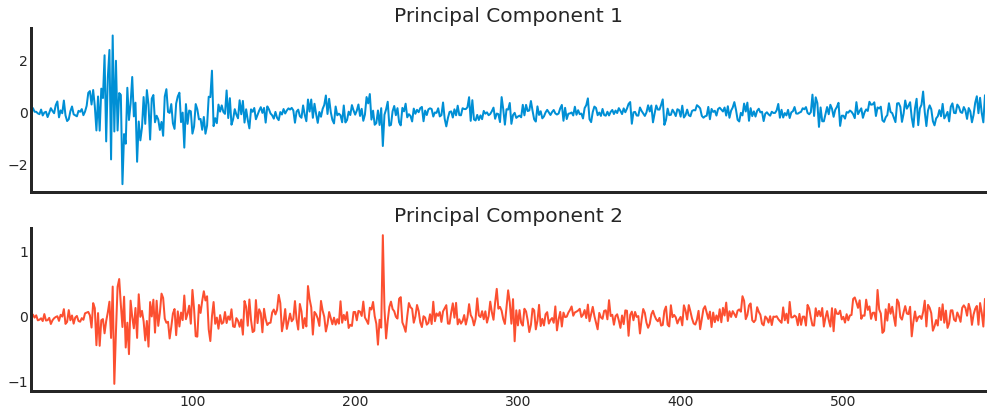

In [ ]:
with sns.axes_style('white'):
    risk_factors.plot(subplots=True,
                      figsize=(14, 6),
                      title=risk_factors.columns.tolist(),
                      legend=False,
                      rot=0,
                      lw=2,
                      xlim=(risk_factors.index.min(),
                            risk_factors.index.max()))

    sns.despine()
    plt.tight_layout()